Importing Packages:

In [1]:
import numpy as np
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import pandas as pd
import shutil
import os
from tqdm import tqdm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from PIL import Image

In [2]:
import numpy as np
import pickle
import cv2
from os import listdir
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
 
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import optimizers
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


For training and test dataset I have clicked pictures of various plant leaves from nearby villages and using these images I will be training a model which will later predict whether a plant is healthy or not by using an image of a leaf as input.


# Exploratory Data Ananlysis:


In [ ]:
train_wd= os.listdir('/content/gdrive/MyDrive/plant_disease/self_collected_data/training/wd') #train dataset with disease
train_woutd= os.listdir('/content/gdrive/MyDrive/plant_disease/self_collected_data/training/woutd') #train dataset without disease
val_wd= os.listdir('/content/gdrive/MyDrive/plant_disease/self_collected_data/test/wd') #validation dataset with disease
val_woutd= os.listdir('/content/gdrive/MyDrive/plant_disease/self_collected_data/test/woutd') #validation dataset without disease
 
train_wd_percent= len(train_wd)/len(train_wd+train_woutd)
train_woutd_percent= len(train_woutd)/len(train_wd+train_woutd)
val_wd_percent= len(val_wd)/len(val_wd+val_woutd)
val_woutd_percent= len(val_woutd)/len(val_wd+ val_woutd)

print("Ratio of healthy and unhealthy plants in training dataset is {}:{}".format(int(train_woutd_percent*100), int(train_wd_percent*100)))
print("Ratio of healthy and unhealthy plants in validation dataset is {}:{}".format(int(val_woutd_percent*100), int(val_wd_percent*100)))

Ratio of healthy and unhealthy plants in training dataset is 41:58
Ratio of healthy and unhealthy plants in validation dataset is 48:51


Pie Chart denoting ratio of healthy and unhleahty images from training dataset:

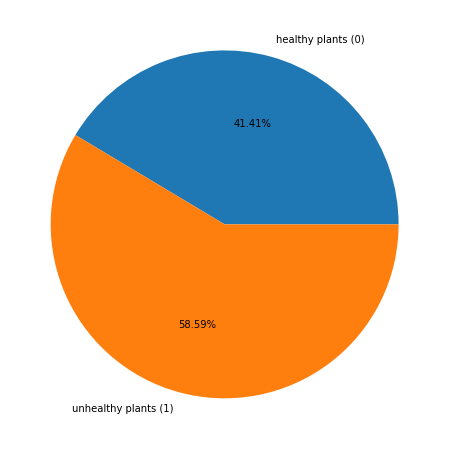

Ratio of healthy and unhealthy plants in training dataset is 41:58


In [ ]:
my_labels=["healthy plants (0)","unhealthy plants (1)"]
plt.rcParams["figure.figsize"] = (8,8)

plt.pie([int(train_woutd_percent*100),
         int(train_wd_percent*100)],
        labels= my_labels,
        autopct='%1.2f%%')
plt.show()

print("Ratio of healthy and unhealthy plants in training dataset is {}:{}".format(int(train_woutd_percent*100),int(train_wd_percent*100)))

Pie Chart denoting ratio of healthy and unhleahty images from validation dataset:

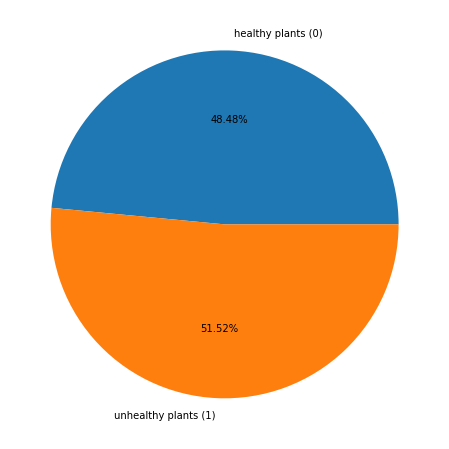

Ratio of healthy and unhealthy plants in validation dataset is 48:51


In [ ]:
my_labels=["healthy plants (0)","unhealthy plants (1)"]
plt.rcParams["figure.figsize"] = (8,8)

plt.pie([int(val_woutd_percent*100),
         int(val_wd_percent*100)],
        labels= my_labels,
        autopct='%1.2f%%')
plt.show()

print("Ratio of healthy and unhealthy plants in validation dataset is {}:{}".format(int(val_woutd_percent*100), int(val_wd_percent*100)))

Dataset is almost balanced with slight unbalancing in train dataset. Validation dataset seems to be almost balanced with a very slight difference.

## Preview of dataset
Lets take a quick look at some of the images from our dataset (healthy and unhealthy plants):


## Plants with diseases

Text(0.5, 1.0, 'Leaf 4')

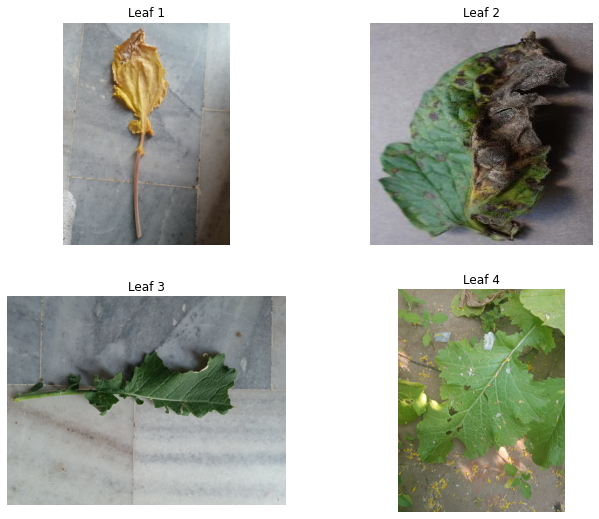

In [ ]:
# create figure
fig = plt.figure(figsize=(11, 9))
  
# reading images
Img_1 = Image.open('/content/gdrive/MyDrive/plant_disease/self_collected_data/training/wd/107I.jpg')
Img_2 = Image.open('/content/gdrive/MyDrive/plant_disease/self_collected_data/training/wd/154I.jpg')
Img_3 = Image.open('/content/gdrive/MyDrive/plant_disease/self_collected_data/training/wd/27I.jpg')
Img_4 = Image.open('/content/gdrive/MyDrive/plant_disease/self_collected_data/training/wd/7I.jpg')
  
# Add subplot at the 1st position
fig.add_subplot(2, 2, 1)
  
# show image
plt.imshow(Img_1)
plt.axis('off')
plt.title("Leaf 1")
  
# Add subplot at the 2nd position
fig.add_subplot(2, 2, 2)
  
# show image
plt.imshow(Img_2)
plt.axis('off')
plt.title("Leaf 2")
  
# Add subplot at the 3rd position
fig.add_subplot(2, 2, 3)
  
# show image
plt.imshow(Img_3)
plt.axis('off')
plt.title("Leaf 3")
  
# Add subplot at the 4th position
fig.add_subplot(2, 2, 4)
  
# show image
plt.imshow(Img_4)
plt.axis('off')
plt.title("Leaf 4")

As we can see from the above images that plants with disease seems to look a lot different from healthy plants' leaves. Plants suffering from disease tend to have discolored leaves like yellow color and also dry in nature. Apart from that leaves often tend to be disfigures, shrink or have cuts at different places.

## Plants without diseases

Text(0.5, 1.0, 'Leaf 4')

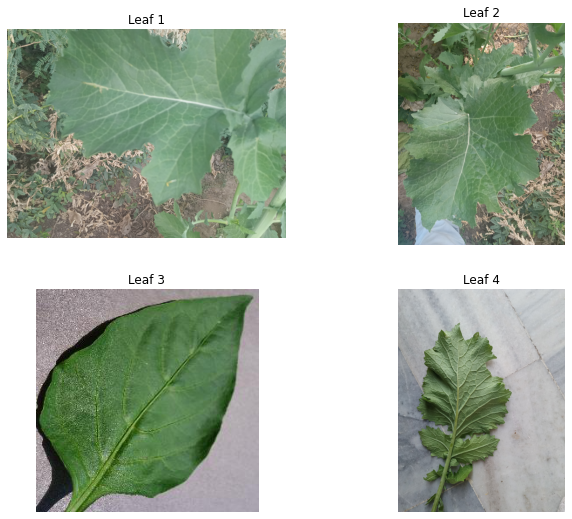

In [ ]:
# create figure
fig = plt.figure(figsize=(11, 9))
  
# reading images
Img_1 = Image.open('/content/gdrive/MyDrive/plant_disease/self_collected_data/training/woutd/63I.jpg')
Img_2 = Image.open('/content/gdrive/MyDrive/plant_disease/self_collected_data/training/woutd/2I.jpg')
Img_3 = Image.open('/content/gdrive/MyDrive/plant_disease/self_collected_data/training/woutd/110I.jpg')
Img_4 = Image.open('/content/gdrive/MyDrive/plant_disease/self_collected_data/training/woutd/27I.jpg')
  
# Add subplot at the 1st position
fig.add_subplot(2, 2, 1)
  
# show image
plt.imshow(Img_1)
plt.axis('off')
plt.title("Leaf 1")
  
# Add subplot at the 2nd position
fig.add_subplot(2, 2, 2)
  
# show image
plt.imshow(Img_2)
plt.axis('off')
plt.title("Leaf 2")
  
# Add subplot at the 3rd position
fig.add_subplot(2, 2, 3)
  
# show image
plt.imshow(Img_3)
plt.axis('off')
plt.title("Leaf 3")
  
# Add subplot at the 4th position
fig.add_subplot(2, 2, 4)
  
# show image
plt.imshow(Img_4)
plt.axis('off')
plt.title("Leaf 4")

Healthy plants look all green in color without any disfigured leaf, without any cuts anywhere in leaf part discoloration or dryness.

# Preprocessing:
For preprocessing, I will be using ImageDataGenerator to transform images as per following:


*   rotation
*   zoom
* vertical_flip
* horizontal_flip
* shear_range



Now, lets check how our ImageDataGenerator will give output image when a single image is input to it:

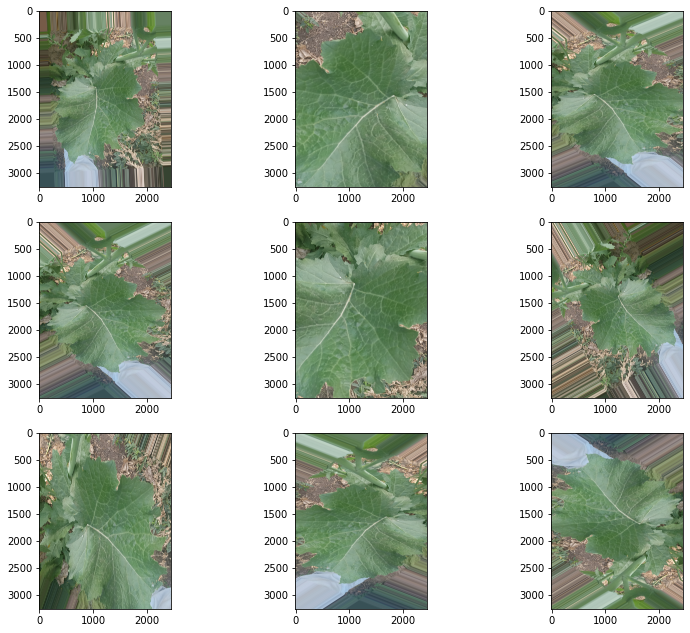

In [ ]:
# load the image
img = load_img('/content/gdrive/MyDrive/plant_disease/self_collected_data/training/woutd/2I.jpg') #takign sample image

data = img_to_array(img) #covert to arrray

samples = np.expand_dims(data, 0)

datagen = ImageDataGenerator(shear_range=0.25,
                                    rotation_range=90,
                                    zoom_range=0.5,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    validation_split=0.2)
# make iterator
it = datagen.flow(samples, batch_size=1)

fig = plt.figure(figsize=(13, 11))
# generate samples and plot
for i in range(9):
    # define subplot
    fig.add_subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

## Reading images from directory in ImageDataGenerator:

In [ ]:
#reading data
data_generator = ImageDataGenerator(validation_split=0.3,
                                    rescale=1/255)

train_generator = data_generator.flow_from_directory(
    directory=r"/content/gdrive/MyDrive/self_collected/data",
    subset='training',
    target_size=(254, 254),
    color_mode="rgb",
    batch_size= 32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

valid_generator = data_generator.flow_from_directory(
    directory=r"/content/gdrive/MyDrive/self_collected/data",
    subset='validation',
    target_size=(254, 254),
    color_mode="rgb",
    batch_size= 32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 1697 images belonging to 2 classes.
Found 726 images belonging to 2 classes.


Since our data is small and we also have little computation power, so to get better performing model we will be using transfer learning using a pre trained weights like 'imagenet'.

# Training on 'Plant Village' dataset to get weights for transfer learning:

### Converting 'Plant Village' dataset into Binary class Dataset:

'Plant Village' dataset originally contains folders with various plants and particular diseases they are suffering from and healthy plants. So originally 'Plant Village' dataset is multiclass dataset. So I will be changing this dataset into binary class  dataset by seperating images of 'healthy' and 'unhealthy' leaves into seperate folders:

In [ ]:
import shutil
import os
from tqdm import tqdm

src_path= '/content/PlantVillage/'
src_root = os.listdir('/content/PlantVillage/')
wd=[] #with disease
wtd=[] #without disease

#seperating healthy and unhealthy plants folder names:
for folder in tqdm(src_root):
  full_folder_name= src_path + folder
  for file_name in os.listdir(full_folder_name):
    if full_folder_name[-7:]!='healthy':
      wd.append(full_folder_name)
    else:
      wtd.append(full_folder_name)

"import shutil\nimport os\nfrom tqdm import tqdm\n\nsrc_path= '/content/PlantVillage/'\nsrc_root = os.listdir('/content/PlantVillage/')\nwd=[]\nwtd=[]\n\nfor folder in tqdm(src_root):\n  full_folder_name= src_path + folder\n  for file_name in os.listdir(full_folder_name):\n    if full_folder_name[-7:]!='healthy':\n      wd.append(full_folder_name)\n    else:\n      wtd.append(full_folder_name)"

In [ ]:
# copy all images of unhealthy leavse into 'wd' i.e with disease folder
cnt=[]
for full_folder_name in list(set(wd)):
  for file_name in tqdm(os.listdir(full_folder_name)):
    full_file_name = full_folder_name + '/' + file_name
    dest= '/content/drive/MyDrive/plant_disease/plant_village/data/wd'
    shutil.copy(full_file_name, dest)
    cnt.append(1)

100%|██████████| 373/373 [00:04<00:00, 86.56it/s]


In [ ]:
len(cnt) #count of images of unhealthy leaves

17418

In [ ]:
# copy all images of healthy leavse into 'wtd' i.e without disease folder
cnt=[]
for full_folder_name in list(set(wtd)):
  for file_name in tqdm(os.listdir(full_folder_name)):
    full_file_name = full_folder_name + '/' + file_name
    dest= '/content/drive/MyDrive/plant_disease/plant_village/data/wtd'
    shutil.copy(full_file_name, dest)
    cnt.append(1)

100%|██████████| 1591/1591 [00:18<00:00, 87.76it/s]


In [ ]:
len(cnt) #count of images of healthy leaves

3221

### Reading Plant Village Data:
Now that we have plant village dataset as Binary Class i.e 'healthy' and 'unhealthy' class we can begin reading this dataset.

In [ ]:
images_ds= tf.data.Dataset.list_files("/content/gdrive/MyDrive/plant_disease/plant_village/data/*/*") #get path to images

In [ ]:
for images in images_ds.take(14):
  print(images)

tf.Tensor(b'/content/gdrive/MyDrive/plant_disease/plant_village/data/wd/12703385-4e74-4e56-b90a-fede2827fbf2___Matt.S_CG 6039.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/plant_disease/plant_village/data/wd/0982d864-182e-4d36-959a-dcc67d85d9e6___RS_Erly.B 9481.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/plant_disease/plant_village/data/wd/23857b36-24f3-4745-a877-dedde5c5931c___YLCV_NREC 2520.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/plant_disease/plant_village/data/wd/a87b8e0c-2279-4cf7-85a4-0fba63130902___RS_Late.B 5323.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/plant_disease/plant_village/data/wd/569206bf-423e-4508-b1b4-2ca6821aceac___RS_Early.B 7554.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/plant_disease/plant_village/data/wd/58d5cbab-162b-4091-8add-21a336398731___Com.G_SpM_FL 8933.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/plant_disease/plant_vill

In [ ]:
image_count= 3000 # number of images(data_size)

Due to memory constraints maximum RAM can hold without crashing is 3000 images

In [ ]:
data_size= int(image_count) # set size
data= images_ds.take(data_size) # get data

In [ ]:
# function to get label
def get_label(file_path):
  import os
  return tf.strings.split(file_path, os.path.sep)[-2]

In [ ]:
#function to get image and label
def process_image(file_path):
  label= get_label(file_path)
  
  img= tf.io.read_file(file_path)
  img= tf.image.decode_jpeg(img)
  img= tf.image.resize(img, [254,254])
  img= img/255

  return img, label

In [ ]:
x=[]
y=[]

for image, label in tqdm(data.map(process_image)):
  x.append(image)
  y.append(label)

100%|██████████| 3000/3000 [09:23<00:00,  5.33it/s]


### Dump and load pickle file:

In [ ]:
import pickle

'''with open('/content/gdrive/MyDrive/plant_disease/plant_village_nondata/pickle/x.pkl','wb') as p:
  pickle.dump(x, p)
with open('/content/gdrive/MyDrive/plant_disease/plant_village_nondata/pickle/y.pkl','wb') as p:
  pickle.dump(y, p)'''

In [ ]:
with open('/content/gdrive/MyDrive/plant_disease/plant_village_nondata/pickle/x.pkl','rb') as p:
  x= pickle.load(p)
with open('/content/gdrive/MyDrive/plant_disease/plant_village_nondata/pickle/y.pkl','rb') as p:
  y= pickle.load(p)

In [ ]:
# converting images to numpy array
x= np.array(x)
y_arr= np.array(y)

y= []
for i  in y_arr:
  i= ((str(i).split(',')[0][12:])[:-1])
  y.append(i)
del y_arr

y= np.asarray(y)

In [ ]:
#converting strings of y into label (1s and 0s) using LabelBinarizer:
label_binarizer = LabelBinarizer()
y_label = label_binarizer.fit_transform(y)
n_classes = len(label_binarizer.classes_)

### Train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size=0.3, random_state = 42, stratify= y_label)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.3, random_state = 42, stratify= y_test)

In [ ]:
epochs_ = 50
learning_rate = 1e-2
batch_size = 32
width=254
height=254
depth=3

### Image Augmentation

In [ ]:
aug = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=30,
    zoom_range=0.25,
    shear_range=0.25, 
    horizontal_flip=True, 
    fill_mode="nearest")

### Making Model

In [ ]:
#defining input_shape
input_shape = (height, width, depth)
chanDim = -1
 
if K.image_data_format() == "channels_first":
    input_shape = (depth, height, width)
    chanDim = 1
 
#model_activation="tanh"
model_activation="relu"

In [ ]:
#note for self: set initial dropouts to 0.25
model = Sequential()
 
inputShape = (height, width, depth)
chanDim = -1
 
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
    
model.add(Conv2D(16, (3, 3), padding="same",input_shape=inputShape, name='Conv2D_1'))
model.add(Activation("relu", name='relu_1'))
model.add(BatchNormalization(axis=chanDim, name='BatchNormalization_1'))
model.add(MaxPooling2D(pool_size=(3, 3), name='MaxPool_1'))
model.add(Dropout(0.25))
 
model.add(Conv2D(32, (3, 3), padding="same", name='Conv2D_2'))
model.add(Activation("relu", name='relu_2'))
model.add(BatchNormalization(axis=chanDim, name='BatchNormalization_2'))
 
model.add(Conv2D(64, (3, 3), padding="same", name='Conv2D_3'))
model.add(Activation("relu", name='relu_3'))
model.add(BatchNormalization(axis=chanDim, name='BatchNormalization_3'))
model.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool_2'))
model.add(Dropout(0.25))
 
model.add(Conv2D(128, (3, 3), padding="same", name='Conv2D_4'))
model.add(Activation("relu", name='relu_4'))
model.add(BatchNormalization(axis=chanDim, name='BatchNormalization_4'))
 
model.add(Conv2D(256, (3, 3), padding="same", name='Conv2D_5'))
model.add(Activation("relu", name='relu_5'))
model.add(BatchNormalization(axis=chanDim, name='BatchNormalization_5'))
model.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool_3'))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu", name='relu_6'))
model.add(BatchNormalization(name='BatchNormalization_6'))
model.add(Dropout(0.5))
 
model.add(Dense(1024))
model.add(Activation("relu", name='relu_7'))
model.add(BatchNormalization(name='BatchNormalization_7'))
model.add(Dropout(0.5))
 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
relu_1 (Activation)          (None, 254, 254, 16)      0         
_________________________________________________________________
BatchNormalization_1 (BatchN (None, 254, 254, 16)      64        
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 84, 84, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 84, 84, 16)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 84, 84, 32)        4640      
_________________________________________________________________
relu_2 (Activation)          (None, 84, 84, 32)       

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/gdrive/MyDrive/plant_disease/plant_village_nondata/plant_village_weights_aug_18_3.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#defining optimizer with learning rate decay with every epochs
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate, decay=learning_rate / epochs_)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
history = model.fit(
    aug.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs_,
    callbacks=callbacks_list,
    verbose=1
    )

Epoch 1/50
65/65 [==============================] - 36s 518ms/step - loss: 0.1185 - accuracy: 0.9584 - val_loss: 0.7685 - val_accuracy: 0.8016

Epoch 00001: val_accuracy improved from -inf to 0.80159, saving model to /content/gdrive/MyDrive/plant_disease/plant_village_nondata/plant_village_weights_aug_18_3.hdf5
Epoch 2/50
65/65 [==============================] - 35s 540ms/step - loss: 0.1411 - accuracy: 0.9565 - val_loss: 0.6672 - val_accuracy: 0.8238

Epoch 00002: val_accuracy improved from 0.80159 to 0.82381, saving model to /content/gdrive/MyDrive/plant_disease/plant_village_nondata/plant_village_weights_aug_18_3.hdf5
Epoch 3/50
65/65 [==============================] - 35s 539ms/step - loss: 0.1259 - accuracy: 0.9613 - val_loss: 0.6055 - val_accuracy: 0.8698

Epoch 00003: val_accuracy improved from 0.82381 to 0.86984, saving model to /content/gdrive/MyDrive/plant_disease/plant_village_nondata/plant_village_weights_aug_18_3.hdf5
Epoch 4/50
65/65 [==============================] - 33s

Now that the model has been trained with 94+ percent accuracy I will save these weights and use later for Transfer Learning on my self collected dataset. 

In [ ]:
model.save_weights('/content/gdrive/MyDrive/Plant_disease/aug_20_4.h5')

### Evaluating the performance of model:

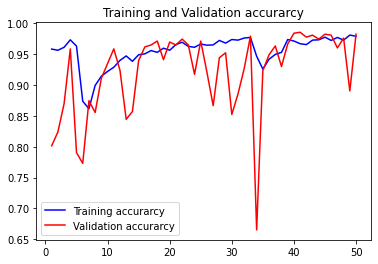

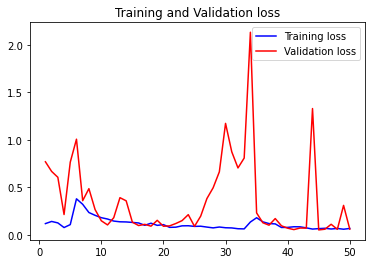

In [ ]:
validation_accuracy = history.history['val_accuracy']
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)
 
#Train and validation accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
 
plt.figure()
#Train and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
x, y = x_test, y_test
x.shape, y.shape

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.utils.np_utils import to_categorical
import tensorflow as tf

scores = model.evaluate(x_test, y_test)

y_pred=[]

for pred in ((model.predict(x_test))): #custom loop with threshold as 0.5
  if pred >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

y_test_new= []
for y in y_test:
  y= np.array_str(y)
  y= int(y[1])
  y_test_new.append(y)

print("CONFUSION MATRIX:")
print( confusion_matrix(y_test_new , y_pred))
print("======================")

print(f"ACCURACY for test dataset is:       {scores[1]}")
print("F1_SCORE for test datset is         {}".format(f1_score(y_test_new , y_pred)))
print("PRECISION_SCORE for test datset is  {}".format(precision_score(y_test_new , y_pred)))
print("RECALL_SCORE for test datset is     {}".format(recall_score(y_test_new , y_pred)))

20/20 [==============================] - 1s 59ms/step - loss: 1.4532 - accuracy: 0.8778
CONFUSION MATRIX:
[[464  72]
 [  5  89]]
ACCURACY for test dataset is:       0.8777777552604675
F1_SCORE for test datset is         0.6980392156862745
PRECISION_SCORE for test datset is  0.5527950310559007
RECALL_SCORE for test datset is     0.9468085106382979


# Trainig Model on self collected data:

In [ ]:
images_ds= tf.data.Dataset.list_files("/content/gdrive/MyDrive/Plant_disease/self_collected/data/*/*") #get path to images

In [ ]:
for images in images_ds.take(3):
  print(images)

tf.Tensor(b'/content/gdrive/MyDrive/Plant_disease/self_collected/data/without_disease/IMG_20200112_180808.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/Plant_disease/self_collected/data/with_disease/withd035 copy.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/Plant_disease/self_collected/data/without_disease/wd251 copy.jpg', shape=(), dtype=string)


In [ ]:
image_count=len(images_ds) #get number of images(data_size)
image_count

2423

In [ ]:
train_size= int(image_count) # set train size

data= images_ds.take(train_size) # get train data

In [ ]:
# function to get label
def get_label(file_path):
  import os
  return tf.strings.split(file_path, os.path.sep)[-2]

In [ ]:
#function to get image and label
def process_image(file_path):
  label= get_label(file_path)
  
  img= tf.io.read_file(file_path)
  img= tf.image.decode_jpeg(img)
  img= tf.image.resize(img, [254,254])
  img= img/255

  return img, label

In [ ]:
x=[]
y=[]

for image, label in tqdm(data.map(process_image)):
  x.append(image)
  y.append(label)

100%|██████████| 2423/2423 [09:10<00:00,  4.40it/s]


In [ ]:
x= np.array(x)
y_arr= np.array(y)

In [ ]:
y= []
for i  in y_arr:
  i= ((str(i).split(',')[0][12:])[:-1])
  y.append(i)
del y_arr

In [ ]:
y= np.asarray(y)

In [ ]:
#converting strings of y into label (1s and 0s):
label_binarizer = LabelBinarizer()
y_label = label_binarizer.fit_transform(y)
n_classes = len(label_binarizer.classes_)

Saving data to pickle:

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/Plant_disease/pickle/x.pkl','wb') as p:
  pickle.dump(x, p)
with open('/content/gdrive/MyDrive/Plant_disease/pickle/y_label.pkl','wb') as p:
  pickle.dump(y_label, p)

In [ ]:
with open('/content/gdrive/MyDrive/Plant_disease/pickle/x.pkl','rb') as p:
  x= pickle.load(p)
with open('/content/gdrive/MyDrive/Plant_disease/pickle/y_label.pkl','rb') as p:
  y_label= pickle.load(p)

Train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size=0.3, random_state = 42, stratify= y_label)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.3, random_state = 42, stratify= y_test)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1696, 254, 254, 3)
(219, 254, 254, 3)
(508, 254, 254, 3)
(1696, 1)
(219, 1)
(508, 1)


In [4]:
learning_rate = 1e-2
batch_size = 32
epochs_ = 300
width=254
height=254
depth=3

### ImageAugmentation using ImageDataGenerator

In [6]:
aug = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=30,
    zoom_range=0.25,
    shear_range=0.25, 
    horizontal_flip=True, 
    fill_mode="nearest")

### Defining model:

In [7]:
#defining input_shape
input_shape = (height, width, depth)
chanDim = -1

if K.image_data_format() == "channels_first":
    input_shape = (depth, height, width)
    chanDim = 1

model_activation="relu"

In [8]:
#note for self: set initial dropouts to 0.25
model = Sequential()

inputShape = (height, width, depth)
chanDim = -1
 
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
    
model.add(Conv2D(16, (3, 3), padding="same",input_shape=inputShape, name='Conv2D_1'))
model.add(Activation("relu", name='relu_1'))
model.add(BatchNormalization(axis=chanDim, name='BatchNormalization_1'))
model.add(MaxPooling2D(pool_size=(3, 3), name='MaxPool_1'))
model.add(Dropout(0.25))
 
model.add(Conv2D(32, (3, 3), padding="same", name='Conv2D_2'))
model.add(Activation("relu", name='relu_2'))
model.add(BatchNormalization(axis=chanDim, name='BatchNormalization_2'))
 
model.add(Conv2D(64, (3, 3), padding="same", name='Conv2D_3'))
model.add(Activation("relu", name='relu_3'))
model.add(BatchNormalization(axis=chanDim, name='BatchNormalization_3'))
model.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool_2'))
model.add(Dropout(0.25))
 
model.add(Conv2D(128, (3, 3), padding="same", name='Conv2D_4'))
model.add(Activation("relu", name='relu_4'))
model.add(BatchNormalization(axis=chanDim, name='BatchNormalization_4'))
 
model.add(Conv2D(256, (3, 3), padding="same", name='Conv2D_5'))
model.add(Activation("relu", name='relu_5'))
model.add(BatchNormalization(axis=chanDim, name='BatchNormalization_5'))
model.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool_3'))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu", name='relu_6'))
model.add(BatchNormalization(name='BatchNormalization_6'))
model.add(Dropout(0.5))
 
model.add(Dense(1024))
model.add(Activation("relu", name='relu_7'))
model.add(BatchNormalization(name='BatchNormalization_7'))
model.add(Dropout(0.5))
 
model.add(Dense(1, activation='sigmoid'))

### Load weights from model previosly trained on plant village dataset:

As we have trained a model previously on 'Plant Village' dataset, the weights obtained after that training will be helpfull for classifiying our dataset well.

In [ ]:
model.load_weights("/content/gdrive/MyDrive/Plant_disease/aug_20_4.h5")

Now that the weights have been loaded, I will be freezing all the layers except last 5 layers of the model on which our collected data will train on:

In [9]:
# unfreezing only last 5 layers
for layer in model.layers[:-5]:
  layer.trainable = False

In [10]:
for l in model.layers:
    print(l.name, l.trainable)

Conv2D_1 False
relu_1 False
BatchNormalization_1 False
MaxPool_1 False
dropout False
Conv2D_2 False
relu_2 False
BatchNormalization_2 False
Conv2D_3 False
relu_3 False
BatchNormalization_3 False
MaxPool_2 False
dropout_1 False
Conv2D_4 False
relu_4 False
BatchNormalization_4 False
Conv2D_5 False
relu_5 False
BatchNormalization_5 False
MaxPool_3 False
dropout_2 False
flatten False
dense False
relu_6 False
BatchNormalization_6 False
dropout_3 False
dense_1 True
relu_7 True
BatchNormalization_7 True
dropout_4 True
dense_2 True


As we can see above that only last 5 layers are trainable now. Rest all layers have ben freezed.

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/gdrive/MyDrive/Plant_disease/aug_20_1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
relu_1 (Activation)          (None, 254, 254, 16)      0         
_________________________________________________________________
BatchNormalization_1 (BatchN (None, 254, 254, 16)      64        
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 84, 84, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 84, 84, 16)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 84, 84, 32)        4640      
_________________________________________________________________
relu_2 (Activation)          (None, 84, 84, 32)        0

In [ ]:
# defining optimizer
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate, decay=learning_rate / epochs_)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
history = model.fit(
    aug.flow(x_train, y_train, batch_size= batch_size),
    validation_data=(x_val, y_val),
    steps_per_epoch=len(x_train) // batch_size,
    callbacks= callbacks_list,
    epochs= epochs_,
    verbose=1
    )

Epoch 1/300
53/53 [==============================] - 27s 498ms/step - loss: 0.7604 - accuracy: 0.7358 - val_loss: 0.6558 - val_accuracy: 0.7854

Epoch 00001: val_accuracy improved from -inf to 0.78539, saving model to /content/gdrive/MyDrive/Plant_disease/aug_20_2.hdf5
Epoch 2/300
53/53 [==============================] - 28s 535ms/step - loss: 0.5435 - accuracy: 0.7871 - val_loss: 0.8256 - val_accuracy: 0.7808

Epoch 00002: val_accuracy did not improve from 0.78539
Epoch 3/300
53/53 [==============================] - 26s 497ms/step - loss: 0.5831 - accuracy: 0.7759 - val_loss: 0.6078 - val_accuracy: 0.7854

Epoch 00003: val_accuracy did not improve from 0.78539
Epoch 4/300
53/53 [==============================] - 26s 489ms/step - loss: 0.5014 - accuracy: 0.8078 - val_loss: 0.4754 - val_accuracy: 0.8493

Epoch 00004: val_accuracy improved from 0.78539 to 0.84932, saving model to /content/gdrive/MyDrive/Plant_disease/aug_20_2.hdf5
Epoch 5/300
53/53 [==============================] - 28s 

### Evaluating final trained model:

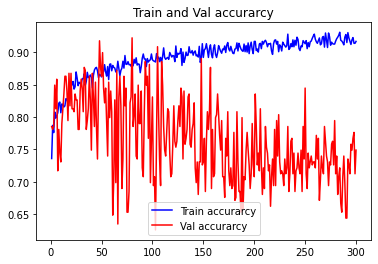

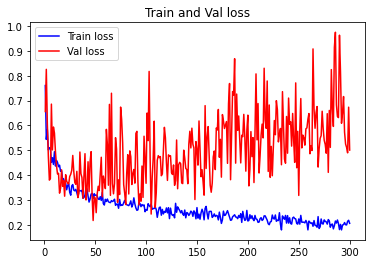

In [ ]:
train_ accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

#Train and validation accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
#load model:
path_to_model= "/content/gdrive/MyDrive/Plant_disease/aug_20_2.hdf5"
model = keras.models.load_model(path_to_model)

In [ ]:
x, y = x_test, y_test
x.shape, y.shape

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.utils.np_utils import to_categorical
import tensorflow as tf

scores = model.evaluate(x_test, y_test)

y_pred=[]

for pred in ((model.predict(x_test))): #custom loop with threshold as 0.1
  if pred >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

y_test_new= []
for y in y_test:
  y= np.array_str(y)
  y= int(y[1])
  y_test_new.append(y)

print("CONFUSION MATRIX:")
print( confusion_matrix(y_test_new , y_pred))
print("======================")

print(f"ACCURACY for test dataset is:       {scores[1]}")
print("F1_SCORE for test datset is         {}".format(f1_score(y_test_new , y_pred)))
print("PRECISION_SCORE for test datset is  {}".format(precision_score(y_test_new , y_pred)))
print("RECALL_SCORE for test datset is     {}".format(recall_score(y_test_new , y_pred)))

16/16 [==============================] - 1s 64ms/step - loss: 0.3158 - accuracy: 0.8642
CONFUSION MATRIX:
[[174  26]
 [ 43 265]]
ACCURACY for test dataset is:       0.8641732335090637
F1_SCORE for test datset is         0.8848080133555927
PRECISION_SCORE for test datset is  0.9106529209621993
RECALL_SCORE for test datset is     0.8603896103896104


# Conclusion:

As we can see that it didn't take much training and results are very great on our data. This is possible because we incorporated 'Transfer Learning' for training on our dataset. The model trained from 'Plant Village' dataset learned greatly to classify healthy and unhealthy plants. Saved Weights from that model helped our second model to train well on self collected data and yields good results.